# Simple linear Regression
# steps which we have learned

1. Reading and understanding the data
2. Training the model
3. Residual analysis
4. Predicting and evaluating on the test set


In [57]:
# Simple Linear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression



# set seaborn style
sns.set_style("whitegrid")

#read the data
advertising = pd.read_csv("C:/Users/chandrasen.wadikar/Desktop/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [58]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [59]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [60]:
advertising.shape

(200, 4)

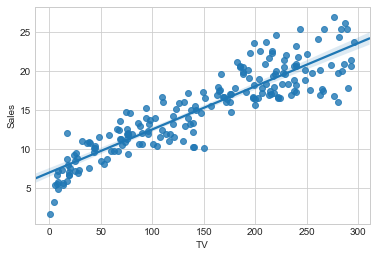

In [61]:
# Visualize the data

sns.regplot(x='TV',y='Sales',data=advertising)
plt.show()


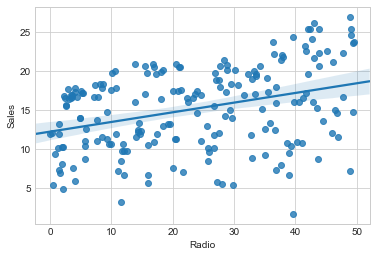

In [62]:
sns.regplot(x='Radio',y='Sales',data=advertising)
plt.show()

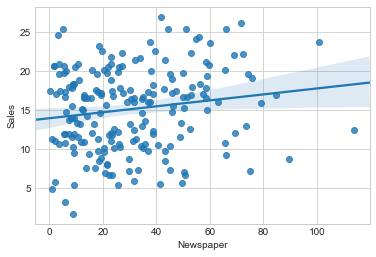

In [63]:
sns.regplot(x='Newspaper',y='Sales',data=advertising)
plt.show()

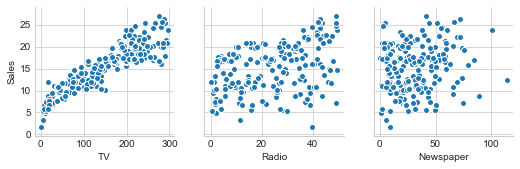

In [64]:
sns.pairplot(data=advertising, x_vars=['TV','Radio','Newspaper'],y_vars='Sales')
plt.show()

In [65]:
advertising.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


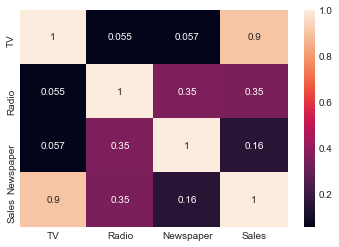

In [66]:
sns.heatmap(advertising.corr(),annot=True)
plt.show()

#Steps for model building process:
- Create x and y
- Create train and test sets(70-30,80-20)
- Train your model on the training set (i.e. learn the coefficients)
- Evaluate the model (training set, test set)


In [67]:
# create x and y

X = advertising ['TV'] # X in caps , becasue your X is Dataframe
y = advertising ['Sales'] # y is in small , because it is predicated variable



In [68]:
# train-test split

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.70, random_state=100)

X_train.shape



C:\PY\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(140,)

In [69]:
X_train


74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
127     80.2
81     239.8
88      88.3
119     19.4
110    225.8
57     136.2
44      25.1
148     38.0
160    172.5
89     109.8
146    240.1
199    232.1
10      66.1
20     218.4
165    234.5
12      23.8
16      67.8
101    296.4
120    141.3
45     175.1
142    220.5
117     76.4
184    253.8
187    191.1
183    287.6
       ...  
129     59.6
159    131.7
132      8.4
108     13.1
155      4.1
130      0.7
86      76.3
93     250.9
137    273.7
144     96.2
58     210.8
60      53.5
107     90.4
143    104.6
198    283.6
34      95.7
14     204.1
66      31.5
53     182.6
98     289.7
180    156.6
94     107.4
138     43.0
176    248.4
79     116.0
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [70]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [71]:
# Traiing the model

X_train_sm = sm.add_constant(X_train) # Add a constant
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
127,1.0,80.2
81,1.0,239.8
88,1.0,88.3
119,1.0,19.4
110,1.0,225.8


In [72]:
# y = c + m1.X1
# y = c.const +m1.TV


# fitting the model
lr = sm.OLS(y_train,X_train_sm) # OLS- Ordinary Least Squares
lr_model = lr.fit()
lr_model.params


const    6.948683
TV       0.054546
dtype: float64

In [73]:
# Sales =6.94+ 0.05.TV

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           1.52e-52
Time:                        15:11:24   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interpretation of Summary of Results :

# 1. Coefficient and P-Values
# 2. R-Squared is 81.6% very high - good sign
# 3. p(F-Statistic) is low => the  fit in not by chance.


In [74]:
y_train_pred = lr_model.predict(X_train_sm)

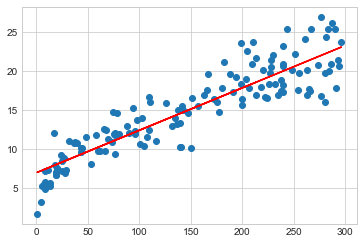

In [75]:
plt.scatter(X_train,y_train)
plt.plot(X_train, y_train_pred,'r') # 6.948 is the Coefficient of Constant and 0.054 is the coefficient of TV, 'r' is a line color
plt.show()

# STEP 3: Residual Analysis


In [ ]:
# error =f(y_train, y_train_pred)


In [76]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
127    11.323253
81     20.028755
88     11.765073
119     8.006871
110    19.265114
57     14.377815
44      8.317782
148     9.021422
160    16.357826
89     12.937807
146    20.045118
199    19.608752
10     10.554157
20     18.861476
165    19.739662
12      8.246872
16     10.646885
101    23.116044
120    14.655998
45     16.499645
142    18.976022
117    11.115979
184    20.792395
187    17.372377
183    22.636042
         ...    
129    10.199610
159    14.132359
132     7.406868
108     7.663233
155     7.172321
130     6.986865
86     11.110524
93     20.634213
137    21.877856
144    12.195985
58     18.446928
60      9.866881
107    11.879619
143    12.654169
198    22.417859
34     12.168712
14     18.081471
66      8.666874
53     16.908738
98     22.750588
180    15.490548
94     12.806897
138     9.294151
176    20.497848
79     13.275991
87     12.986898
103    17.197830
67     14.5469

In [77]:
res = y_train - y_train_pred

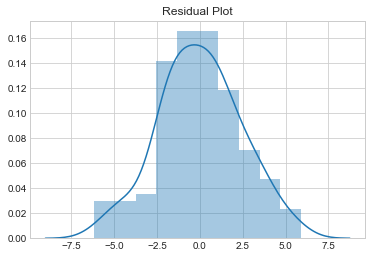

In [78]:
# plot the residuals

plt. figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()

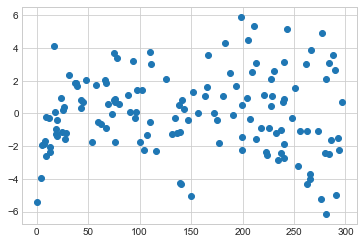

In [79]:
# look for patterns in residulas ( we should not be able to identify)

plt.scatter(X_train,res)
plt.show()


Step 4 : Predications and Evaluation on the Test Set


In [ ]:
# Predications on test ser (y_test_pred)
# evaluate the model, r-squared on the test

In [80]:
# Add a constant / intercept to test

X_test_sm = sm.add_constant(X_test)

# Predactions on the test
    
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [81]:
# evaluate the model, r-squared on the test
# R-squared

r2 = r2_score(y_true=y_test,y_pred=y_test_pred) # calculate on test data set
r2

0.7921031601245658

In [82]:
r2_score(y_true=y_train,y_pred=y_train_pred) # calculate on train data set

0.8157933136480389

In [83]:
# Mean Squared Error

mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826956

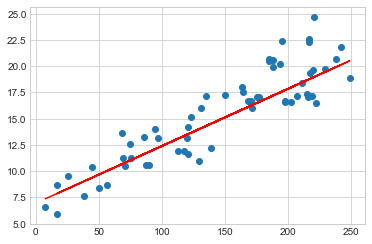

In [84]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_test_pred,'r') 
plt.show()

Linear Regression using SKlearn


In [85]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.70, random_state=100)

C:\PY\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [88]:
X_train.shape
# reshape to X_train to (140,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)
X_train_lm.shape
X_train_lm.shape
#(140,)
#(140,1)

(140, 1)

In [89]:
# Steps in sklearn model building

# 1. Create an object of linear regression 
lm = LinearRegression()
# 2. fir the model
lm.fit(X_train_lm,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
# 3. see the parameters, make predications(train, test)
print(lm.coef_)
print(lm.intercept_)
# 4, evaluate (r2 etc.)

[0.05454575]
6.948683200001357


In [91]:
# make predications
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_train_lm)

In [95]:
# 4. Evaluate the model
print (r2_score(y_true=y_train,y_pred=y_train_pred))

#print (r2_score(y_true=y_test,y_pred=y_test_pred))
print (r2_score(y_true=y_test, y_pred=y_test_pred))



0.8157933136480389


ValueError: Found input variables with inconsistent numbers of samples: [60, 140]